In [1]:
# import packages
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import os
from IPython.display import display
from pandas import read_csv
from matplotlib import pyplot
import datetime
from google.colab import files
from google.colab import drive
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale
import pickle
import csv
import os
import torch
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
#from keras.callbacks import EarlyStopping
from keras.layers import ConvLSTM2D

In [2]:
#@title Drive Mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset-Unicauca-Version2-87Atts.csv')

In [ ]:
# get shape and data types of the dataset
pd.set_option('display.max_rows', None, 'display.max_columns', None)
print(df.shape)
print(df.dtypes)

(3577296, 87)
Flow.ID                         object
Source.IP                       object
Source.Port                      int64
Destination.IP                  object
Destination.Port                 int64
Protocol                         int64
Timestamp                       object
Flow.Duration                    int64
Total.Fwd.Packets                int64
Total.Backward.Packets           int64
Total.Length.of.Fwd.Packets      int64
Total.Length.of.Bwd.Packets    float64
Fwd.Packet.Length.Max            int64
Fwd.Packet.Length.Min            int64
Fwd.Packet.Length.Mean         float64
Fwd.Packet.Length.Std          float64
Bwd.Packet.Length.Max            int64
Bwd.Packet.Length.Min            int64
Bwd.Packet.Length.Mean         float64
Bwd.Packet.Length.Std          float64
Flow.Bytes.s                   float64
Flow.Packets.s                 float64
Flow.IAT.Mean                  float64
Flow.IAT.Std                   float64
Flow.IAT.Max                   float64
Flow.IAT.Mi

In [ ]:
# Print dataset head
df.head(5)

Flow.ID      Source.IP  Source.Port  \
0    172.19.1.46-10.200.7.7-52422-3128-6    172.19.1.46        52422   
1    172.19.1.46-10.200.7.7-52422-3128-6     10.200.7.7         3128   
2   10.200.7.217-50.31.185.39-38848-80-6   50.31.185.39           80   
3   10.200.7.217-50.31.185.39-38848-80-6   50.31.185.39           80   
4  192.168.72.43-10.200.7.7-55961-3128-6  192.168.72.43        55961   

  Destination.IP  Destination.Port  Protocol           Timestamp  \
0     10.200.7.7              3128         6  26/04/201711:11:17   
1    172.19.1.46             52422         6  26/04/201711:11:17   
2   10.200.7.217             38848         6  26/04/201711:11:17   
3   10.200.7.217             38848         6  26/04/201711:11:17   
4     10.200.7.7              3128         6  26/04/201711:11:17   

   Flow.Duration  Total.Fwd.Packets  Total.Backward.Packets  \
0          45523                 22                      55   
1              1                  2                       0   
2              1                  3                       0   
3            217                  1                       3   
4          78068                  5                       0   

   Total.Length.of.Fwd.Packets  Total.Length.of.Bwd.Packets  \
0                          132                     110414.0   
1                           12                          0.0   
2                          674                          0.0   
3                            0                          0.0   
4                         1076                          0.0   

   Fwd.Packet.Length.Max  Fwd.Packet.Length.Min  Fwd.Packet.Length.Mean  \
0                      6                      6                6.000000   
1                      6                      6                6.000000   
2                    337                      0              224.666667   
3                      0                      0                0.000000   
4                    529                      6              215.200000   

   Fwd.Packet.Length.Std  Bwd.Packet.Length.Max  Bwd.Packet.Length.Min  \
0               0.000000                   4380                   1187   
1               0.000000                      0                      0   
2             194.567041                      0                      0   
3               0.000000                      0                      0   
4             286.458898                      0                      0   

   Bwd.Packet.Length.Mean  Bwd.Packet.Length.Std  Flow.Bytes.s  \
0             2007.527273             768.481689  2.428355e+06   
1                0.000000               0.000000  1.200000e+07   
2                0.000000               0.000000  6.740000e+08   
3                0.000000               0.000000  0.000000e+00   
4                0.000000               0.000000  1.378286e+04   

   Flow.Packets.s  Flow.IAT.Mean  Flow.IAT.Std  Flow.IAT.Max  Flow.IAT.Min  \
0    1.691453e+03     598.986842    816.061346        3880.0             1   
1    2.000000e+06       1.000000      0.000000           1.0             1   
2    3.000000e+06       0.500000      0.707107           1.0             0   
3    1.843318e+04      72.333333     62.660461         110.0             0   
4    6.404673e+01   19517.000000  25758.502350       54313.0             0   

   Fwd.IAT.Total  Fwd.IAT.Mean   Fwd.IAT.Std  Fwd.IAT.Max  Fwd.IAT.Min  \
0        45523.0   2167.761905   1319.384512       5988.0        698.0   
1            1.0      1.000000      0.000000          1.0          1.0   
2            1.0      0.500000      0.707107          1.0          0.0   
3            0.0      0.000000      0.000000          0.0          0.0   
4        78068.0  19517.000000  25758.502350      54313.0          0.0   

   Bwd.IAT.Total  Bwd.IAT.Mean  Bwd.IAT.Std  Bwd.IAT.Max  Bwd.IAT.Min  \
0        41178.0    762.555556  1230.348220       5133.0          1.0   
1            0.0      0.000000     0.000000          0.0          0.0   
2      

In [ ]:
for col in df.columns:  # Go through all columns of dataset to find the missing data  
    pct_missing = np.mean(df[col].isnull()) # isnull() function detect missing values in the given series object
    print('{} - {}%'.format(col, round(pct_missing*100)))  # make a list of missing data % for each feature

Flow.ID - 0%
Source.IP - 0%
Source.Port - 0%
Destination.IP - 0%
Destination.Port - 0%
Protocol - 0%
Timestamp - 0%
Flow.Duration - 0%
Total.Fwd.Packets - 0%
Total.Backward.Packets - 0%
Total.Length.of.Fwd.Packets - 0%
Total.Length.of.Bwd.Packets - 0%
Fwd.Packet.Length.Max - 0%
Fwd.Packet.Length.Min - 0%
Fwd.Packet.Length.Mean - 0%
Fwd.Packet.Length.Std - 0%
Bwd.Packet.Length.Max - 0%
Bwd.Packet.Length.Min - 0%
Bwd.Packet.Length.Mean - 0%
Bwd.Packet.Length.Std - 0%
Flow.Bytes.s - 0%
Flow.Packets.s - 0%
Flow.IAT.Mean - 0%
Flow.IAT.Std - 0%
Flow.IAT.Max - 0%
Flow.IAT.Min - 0%
Fwd.IAT.Total - 0%
Fwd.IAT.Mean - 0%
Fwd.IAT.Std - 0%
Fwd.IAT.Max - 0%
Fwd.IAT.Min - 0%
Bwd.IAT.Total - 0%
Bwd.IAT.Mean - 0%
Bwd.IAT.Std - 0%
Bwd.IAT.Max - 0%
Bwd.IAT.Min - 0%
Fwd.PSH.Flags - 0%
Bwd.PSH.Flags - 0%
Fwd.URG.Flags - 0%
Bwd.URG.Flags - 0%
Fwd.Header.Length - 0%
Bwd.Header.Length - 0%
Fwd.Packets.s - 0%
Bwd.Packets.s - 0%
Min.Packet.Length - 0%
Max.Packet.Length - 0%
Packet.Length.Mean - 0%
Packet.Length

In [ ]:
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Protocol: 99.87921%
6     3572975
17       2684
0        1637
Name: Protocol, dtype: int64

Bwd.PSH.Flags: 100.00000%
0    3577296
Name: Bwd.PSH.Flags, dtype: int64

Fwd.URG.Flags: 100.00000%
0    3577296
Name: Fwd.URG.Flags, dtype: int64

Bwd.URG.Flags: 100.00000%
0    3577296
Name: Bwd.URG.Flags, dtype: int64

FIN.Flag.Count: 99.29628%
0    3552122
1      25174
Name: FIN.Flag.Count, dtype: int64

RST.Flag.Count: 99.93344%
0    3574915
1       2381
Name: RST.Flag.Count, dtype: int64

CWE.Flag.Count: 100.00000%
0    3577296
Name: CWE.Flag.Count, dtype: int64

ECE.Flag.Count: 99.93434%
0    3574947
1       2349
Name: ECE.Flag.Count, dtype: int64

Fwd.Avg.Bytes.Bulk: 100.00000%
0    3577296
Name: Fwd.Avg.Bytes.Bulk, dtype: int64

Fwd.Avg.Packets.Bulk: 100.00000%
0    3577296
Name: Fwd.Avg.Packets.Bulk, dtype: int64

Fwd.Avg.Bulk.Rate: 100.00000%
0    3577296
Name: Fwd.Avg.Bulk.Rate, dtype: int64

Bwd.Avg.Bytes.Bulk: 100.00000%
0    3577296
Name: Bwd.Avg.Bytes.Bulk, dtype: int64

Bwd.Avg.

In [ ]:
########Removing Unnecessary Culomns
df = df.drop(["Flow.Duration","Fwd.Packet.Length.Max","Fwd.Packet.Length.Min","Fwd.Packet.Length.Mean","Fwd.Packet.Length.Std","Bwd.Packet.Length.Max","Bwd.Packet.Length.Min","Bwd.Packet.Length.Mean","Bwd.Packet.Length.Std",
              "Flow.IAT.Mean","Flow.IAT.Std","Flow.IAT.Max","Flow.IAT.Min","Fwd.IAT.Total","Fwd.IAT.Mean","Fwd.IAT.Std","Fwd.IAT.Max","Fwd.IAT.Min","Bwd.IAT.Total",
              "Bwd.IAT.Mean","Bwd.IAT.Std","Bwd.IAT.Max","Bwd.IAT.Min","Min.Packet.Length","Max.Packet.Length","Packet.Length.Mean","Packet.Length.Std","Packet.Length.Variance","Down.Up.Ratio","Avg.Fwd.Segment.Size",
              "Avg.Bwd.Segment.Size","Fwd.Header.Length.1","Fwd.Avg.Bytes.Bulk","Fwd.Avg.Packets.Bulk","Fwd.Avg.Bulk.Rate","Bwd.Avg.Bytes.Bulk","Bwd.Avg.Packets.Bulk","Bwd.Avg.Bulk.Rate","Subflow.Fwd.Packets","Subflow.Fwd.Bytes",
              "Subflow.Bwd.Packets","Subflow.Bwd.Bytes","Init_Win_bytes_forward","Init_Win_bytes_backward","act_data_pkt_fwd","min_seg_size_forward","Active.Mean","Active.Std","Active.Max","Active.Min","Idle.Mean","Idle.Std",
              "Idle.Max","Idle.Min","Label"], axis=1)

In [ ]:
for col in df.columns:  # Go through all columns of dataset to find the missing data  
    pct_missing = np.mean(df[col].isnull()) # isnull() function detect missing values in the given series object
    print('{} - {}%'.format(col, round(pct_missing*100)))  # make a list of missing data % for each feature

Flow.ID - 0%
Source.IP - 0%
Source.Port - 0%
Destination.IP - 0%
Destination.Port - 0%
Protocol - 0%
Timestamp - 0%
Total.Fwd.Packets - 0%
Total.Backward.Packets - 0%
Total.Length.of.Fwd.Packets - 0%
Total.Length.of.Bwd.Packets - 0%
Flow.Bytes.s - 0%
Flow.Packets.s - 0%
Fwd.PSH.Flags - 0%
Bwd.PSH.Flags - 0%
Fwd.URG.Flags - 0%
Bwd.URG.Flags - 0%
Fwd.Header.Length - 0%
Bwd.Header.Length - 0%
Fwd.Packets.s - 0%
Bwd.Packets.s - 0%
FIN.Flag.Count - 0%
SYN.Flag.Count - 0%
RST.Flag.Count - 0%
PSH.Flag.Count - 0%
ACK.Flag.Count - 0%
URG.Flag.Count - 0%
CWE.Flag.Count - 0%
ECE.Flag.Count - 0%
Average.Packet.Size - 0%
L7Protocol - 0%
ProtocolName - 0%


In [ ]:
#######Create a culumn for sum up the Total.Fwd.Packets	and Total.Backward.Packets
df['Total.Num.Packets']=df['Total.Fwd.Packets']+df['Total.Backward.Packets']

#######Create a culumn for sum up the Total.Length.of.Fwd.Packets and	Total.Length.of.Bwd.Packets
df['Total.bytes.of.Packets']=df['Total.Length.of.Fwd.Packets']+df['Total.Length.of.Bwd.Packets']


In [ ]:
print(type(df.Timestamp[0]))

<class 'str'>


In [ ]:
df['Timestamp']=pd.to_datetime(df['Timestamp'], format="%d/%m/%Y%H:%M:%S")

In [ ]:
df['Timestamp'].head()
df['Timestamp'].dtype

dtype('<M8[ns]')

In [ ]:
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

True

In [ ]:
print(type(df.Timestamp[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
df['Dates'] = df['Timestamp'].dt.date
df['Time'] = df['Timestamp'].dt.time

In [ ]:
print(type(df.Dates[0]))

<class 'datetime.date'>


In [ ]:
####Keep the records belong to April 26
##filtered_df = df['Dates'] == '2017-04-26'
df['Dates'] = pd.to_datetime(df['Dates'], format='%Y-%m-%d')
filtered_df = df.query("Dates >= '2017-04-26' \
                       and Dates < '2017-04-27'")

In [ ]:
filtered_df.head()

Flow.ID      Source.IP  Source.Port  \
0    172.19.1.46-10.200.7.7-52422-3128-6    172.19.1.46        52422   
1    172.19.1.46-10.200.7.7-52422-3128-6     10.200.7.7         3128   
2   10.200.7.217-50.31.185.39-38848-80-6   50.31.185.39           80   
3   10.200.7.217-50.31.185.39-38848-80-6   50.31.185.39           80   
4  192.168.72.43-10.200.7.7-55961-3128-6  192.168.72.43        55961   

  Destination.IP  Destination.Port  Protocol           Timestamp  \
0     10.200.7.7              3128         6 2017-04-26 11:11:17   
1    172.19.1.46             52422         6 2017-04-26 11:11:17   
2   10.200.7.217             38848         6 2017-04-26 11:11:17   
3   10.200.7.217             38848         6 2017-04-26 11:11:17   
4     10.200.7.7              3128         6 2017-04-26 11:11:17   

   Total.Fwd.Packets  Total.Backward.Packets  Total.Length.of.Fwd.Packets  \
0                 22                      55                          132   
1                  2                       0                           12   
2                  3                       0                          674   
3                  1                       3                            0   
4                  5                       0                         1076   

   Total.Length.of.Bwd.Packets  Flow.Bytes.s  Flow.Packets.s  Fwd.PSH.Flags  \
0                     110414.0  2.428355e+06    1.691453e+03              0   
1                          0.0  1.200000e+07    2.000000e+06              0   
2                          0.0  6.740000e+08    3.000000e+06              1   
3                          0.0  0.000000e+00    1.843318e+04              0   
4                          0.0  1.378286e+04    6.404673e+01              1   

   Bwd.PSH.Flags  Fwd.URG.Flags  Bwd.URG.Flags  Fwd.Header.Length  \
0              0              0              0                440   
1              0              0              0                 40   
2              0              0              0                 96   
3              0              0              0                 32   
4              0              0              0                100   

   Bwd.Header.Length  Fwd.Packets.s  Bwd.Packets.s  FIN.Flag.Count  \
0               1100   4.832722e+02    1208.180480               0   
1                  0   2.000000e+06       0.000000               0   
2                  0   3.000000e+06       0.000000               0   
3                 96   4.608295e+03   13824.884793               0   
4                  0   6.404673e+01       0.000000               0   

   SYN.Flag.Count  RST.Flag.Count  PSH.Flag.Count  ACK.Flag.Count  \
0               0               0               0               1   
1               0               0               0               1   
2               1               0               0               1   
3               0               0               0               1   
4               1               0               0               1   

   URG.Flag.Count  CWE.Flag.Count  ECE.Flag.Count  Average.Packet.Size  \
0               0               0               0           1435.74026   
1               1               0               0              9.00000   
2               0               0               0            337.00000   
3               1               0               0              0.00000   
4               0               0               0            321.00000   

   L7Protocol ProtocolName  Total.Num.Packets  Total.bytes.of.Packets  \
0         131   HTTP_PROXY                 77                110546.0   
1         131   HTTP_PROXY                  2                    12.0   
2           7         HTTP                  3                   674.0   
3           7         HTTP                  4                     0.0   
4         131   HTTP_PROXY                  5                  1076.0   

       Dates      Time  
0 2017-04-26  11:11:17  
1 2017-04-26  11:11:17  
2 2017-04-26  11:11:17  
3 2017-04-26  11:1

In [ ]:
filtered_df.shape

(307989, 36)

In [ ]:
filtered_df.sort_values(by='Time',ascending=True,inplace=True)
filtered_df.head(5)

Flow.ID       Source.IP  Source.Port  \
291928  10.200.7.195-52.202.177.242-47247-443-6  52.202.177.242          443   
249200   192.168.180.16-10.200.7.5-35768-3128-6  192.168.180.16        35768   
249202   192.168.180.16-10.200.7.5-35782-3128-6  192.168.180.16        35782   
247523   192.168.180.14-10.200.7.6-48614-3128-6  192.168.180.14        48614   
249204   192.168.180.16-10.200.7.5-35779-3128-6  192.168.180.16        35779   

       Destination.IP  Destination.Port  Protocol           Timestamp  \
291928   10.200.7.195             47247         6 2017-04-26 03:03:25   
249200     10.200.7.5              3128         6 2017-04-26 03:03:25   
249202     10.200.7.5              3128         6 2017-04-26 03:03:25   
247523     10.200.7.6              3128         6 2017-04-26 03:03:25   
249204     10.200.7.5              3128         6 2017-04-26 03:03:25   

        Total.Fwd.Packets  Total.Backward.Packets  \
291928                 45                      42   
249200                 73                      40   
249202                113                      91   
247523                397                     285   
249204                106                     100   

        Total.Length.of.Fwd.Packets  Total.Length.of.Bwd.Packets  \
291928                        25711                      41206.0   
249200                         2950                      75574.0   
249202                         2652                     155874.0   
247523                         1347                     780875.0   
249204                         3602                     172035.0   

        Flow.Bytes.s  Flow.Packets.s  Fwd.PSH.Flags  Bwd.PSH.Flags  \
291928    632.425491        0.822228              0              0   
249200  32727.674357       47.096776              1              0   
249202  57219.212540       73.632839              1              0   
247523  12682.657272       11.057695              0              0   
249204  61258.178825       71.848101              1              0   

        Fwd.URG.Flags  Bwd.URG.Flags  Fwd.Header.Length  Bwd.Header.Length  \
291928              0              0               1440               1344   
249200              0              0               2336               1280   
249202              0              0               3616               2912   
247523              0              0              12712               9128   
249204              0              0               3392               3200   

        Fwd.Packets.s  Bwd.Packets.s  FIN.Flag.Count  SYN.Flag.Count  \
291928       0.425290       0.396938               0               0   
249200      30.425351      16.671425               0               1   
249202      40.786817      32.846021               0               1   
247523       6.436811       4.620884               0               0   
249204      36.970382      34.877719               0               1   

        RST.Flag.Count  PSH.Flag.Count  ACK.Flag.Count  URG.Flag.Count  \
291928               0               0               1               0   
249200               0               0               1               0   
249202               0               0               1               0   
247523               0               1               0               0   
249204               0               0               1               0   

        CWE.Flag.Count  ECE.Flag.Count  Average.Packet.Size  L7Protocol  \
291928               0               0           785.804598         178   
249200               0               0           698.654867         131   
249202               0               0           779.088235         131   
247523               0               0          1146.953079         131   
249204               0               0           854.645631         131   

       ProtocolName  Total.Num.Packets  Total.bytes.of.Packets      Dates  \
291928       AMAZON                 87                 66917.0 2017-04-26   
249200   HTTP_PROXY

In [ ]:
feature_names = ['Destination.IP', 'Destination.Port', 'Source.IP', 'Init_Win_bytes_forward',
 'min_seg_size_forward', 'Fwd.Packet.Length.Max', 'Init_Win_bytes_backward', 'Flow.IAT.Max',
 'Source.Port', 'Flow.Duration', 'Fwd.Packet.Length.Std', 'Bwd.IAT.Total',
 'Avg.Fwd.Segment.Size', 'Fwd.Packets.s', 'Fwd.IAT.Total', 'Fwd.IAT.Max',
 'Fwd.Packet.Length.Mean', 'Subflow.Fwd.Bytes', 'Flow.Bytes.s', 'Min.Packet.Length',
 'Total.Length.of.Fwd.Packets', 'Bwd.IAT.Max', 'Packet.Length.Variance', 'Bwd.Packets.s',
 'Flow.IAT.Mean', 'Fwd.Header.Length', 'act_data_pkt_fwd', 'Max.Packet.Length',
 'Flow.Packets.s', 'Flow.IAT.Std', 'Packet.Length.Std', 'Idle.Max',
 'Fwd.Header.Length.1', 'Bwd.Packet.Length.Mean', 'Bwd.IAT.Std', 'Fwd.Packet.Length.Min',
 'Bwd.Packet.Length.Std', 'Avg.Bwd.Segment.Size', 'Average.Packet.Size', 'Total.Length.of.Bwd.Packets',
 'Packet.Length.Mean', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Flow.IAT.Min',
 'Bwd.IAT.Mean', 'Bwd.Packet.Length.Max', 'Subflow.Fwd.Packets', 'Total.Fwd.Packets',
 'Total.Backward.Packets', 'Bwd.Header.Length', 'Subflow.Bwd.Bytes', 'Subflow.Bwd.Packets', 
 'Idle.Mean', 'Fwd.IAT.Min', 'Down.Up.Ratio', 'Idle.Min']

In [ ]:
# Function that changes IP addresses into numbers
import socket, struct
def ip2int(ip):
    packedIP = socket.inet_aton(ip)
    return struct.unpack("!L", packedIP)[0]

In [ ]:
# Converting IP addresses into numbers
df['Source.IP'] = df['Source.IP'].apply(ip2int)
df['Destination.IP'] = df['Destination.IP'].apply(ip2int)

In [ ]:
# Checking occurance of each application
df['ProtocolName'].value_counts()

GOOGLE               959110
HTTP                 683734
HTTP_PROXY           623210
SSL                  404883
HTTP_CONNECT         317526
YOUTUBE              170781
AMAZON                86875
MICROSOFT             54710
GMAIL                 40260
WINDOWS_UPDATE        34471
SKYPE                 30657
FACEBOOK              29033
DROPBOX               25102
YAHOO                 21268
TWITTER               18259
CLOUDFLARE            14737
MSN                   14478
CONTENT_FLASH          8589
APPLE                  7615
OFFICE_365             5941
WHATSAPP               4593
INSTAGRAM              2415
WIKIPEDIA              2025
MS_ONE_DRIVE           1748
DNS                    1695
IP_ICMP                1631
NETFLIX                1560
APPLE_ITUNES           1287
SPOTIFY                1269
APPLE_ICLOUD           1200
EBAY                   1192
SSL_NO_CERT             856
GOOGLE_MAPS             807
EASYTAXI                705
TEAMVIEWER              527
HTTP_DOWNLOAD       

In [ ]:
# Features that will be removed from dataset because they have low occurances of records in dataset
feats_toDelete = df['ProtocolName'].value_counts()[-25:].index
feats_toDelete

Index(['H323', 'CNN', 'LASTFM', 'CITRIX', 'ORACLE', 'TEAMSPEAK', 'BGP', 'RTMP',
       'BITTORRENT', 'WHOIS_DAS', 'SKINNY', 'OPENSIGNAL', 'MAIL_IMAPS',
       'OSCAR', 'LOTUS_NOTES', 'SIMET', 'IP_OSPF', 'RADIUS', 'OPENVPN', 'SNMP',
       'STARCRAFT', 'QQ', '99TAXI', 'SOCKS', 'NFS'],
      dtype='object')

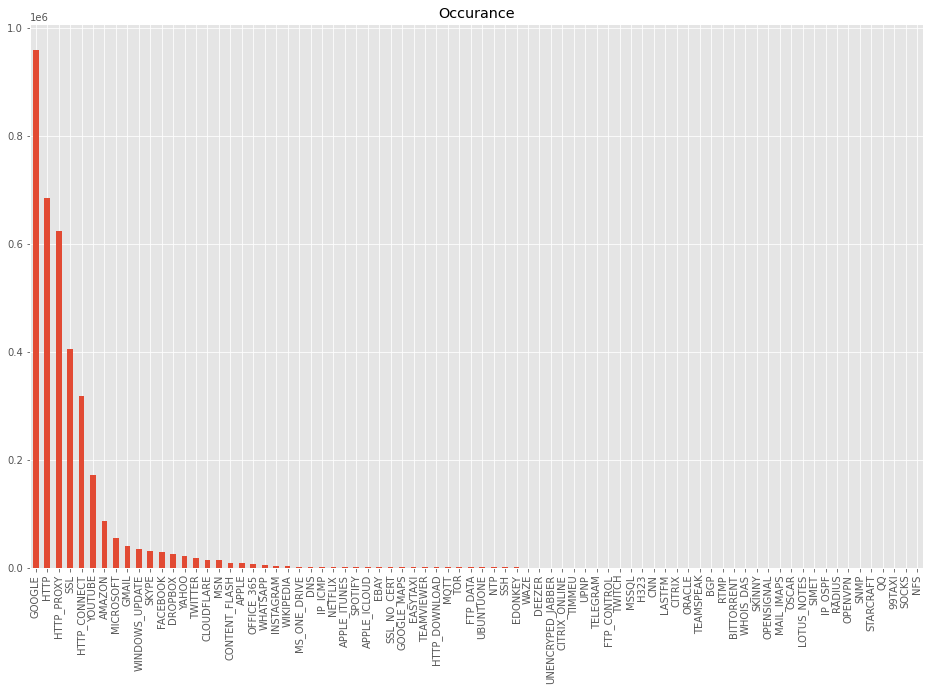

In [ ]:
# Plot the number of records for individual applications
target_count = df['ProtocolName'].value_counts()
plt.figure(figsize=(16,10))
target_count.plot(kind='bar', title='Occurance');

In [ ]:
# Removal of the applications saved in feats_toDelete var because they occur in a small amount of records and do not have a major impact on the model
df = df[~df.ProtocolName.isin(feats_toDelete)]

In [ ]:
feature_names = [x for x in filtered_df.columns if x != 'ProtocolName']
X = filtered_df[feature_names].astype(str)
Y = filtered_df['ProtocolName']

In [ ]:
# Convert application names to numbers
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [ ]:
from collections import Counter
print(sorted(Counter(Y).items()))

[('AMAZON', 4613), ('APPLE', 626), ('APPLE_ICLOUD', 150), ('APPLE_ITUNES', 42), ('CITRIX', 11), ('CLOUDFLARE', 1586), ('CONTENT_FLASH', 430), ('DNS', 124), ('DROPBOX', 2503), ('EASYTAXI', 20), ('EBAY', 70), ('FACEBOOK', 1778), ('FTP_DATA', 20), ('GMAIL', 3091), ('GOOGLE', 83824), ('GOOGLE_MAPS', 31), ('HTTP', 75856), ('HTTP_CONNECT', 22732), ('HTTP_DOWNLOAD', 85), ('HTTP_PROXY', 48844), ('INSTAGRAM', 153), ('IP_ICMP', 129), ('MAIL_IMAPS', 3), ('MICROSOFT', 4576), ('MQTT', 11), ('MSN', 1141), ('MSSQL', 2), ('MS_ONE_DRIVE', 174), ('NETFLIX', 161), ('NTP', 7), ('OFFICE_365', 264), ('OPENSIGNAL', 9), ('SKYPE', 2565), ('SPOTIFY', 3), ('SSH', 15), ('SSL', 30750), ('SSL_NO_CERT', 96), ('TEAMVIEWER', 22), ('TOR', 15), ('TWITCH', 24), ('TWITTER', 1463), ('UBUNTUONE', 28), ('WHATSAPP', 246), ('WIKIPEDIA', 486), ('WINDOWS_UPDATE', 2990), ('YAHOO', 2122), ('YOUTUBE', 14098)]


In [ ]:
volume_Prediction = filtered_df[["Source.IP","Source.Port","Destination.IP","Destination.Port","Total.Fwd.Packets","Total.Backward.Packets","Total.Length.of.Fwd.Packets","Total.Length.of.Bwd.Packets","Total.Num.Packets","Total.bytes.of.Packets","Dates","Time"]]

In [ ]:
volume_Prediction.head(2000)

Source.IP  Source.Port   Destination.IP  Destination.Port  \
291928   52.202.177.242          443     10.200.7.195             47247   
249200   192.168.180.16        35768       10.200.7.5              3128   
249202   192.168.180.16        35782       10.200.7.5              3128   
247523   192.168.180.14        48614       10.200.7.6              3128   
249204   192.168.180.16        35779       10.200.7.5              3128   
247522   192.168.180.14        48598       10.200.7.6              3128   
249206   192.168.180.16        35781       10.200.7.5              3128   
247521   192.168.180.14        48606       10.200.7.6              3128   
247515   192.168.180.14        56511       10.200.7.7              3128   
247512   192.168.180.14        48618       10.200.7.6              3128   
293542     69.31.54.133           80     10.200.7.194             35199   
247507   192.168.180.14        48586       10.200.7.6              3128   
242429   192.168.130.19        52182       10.200.7.5              3128   
255758     192.168.29.6        56787       10.200.7.8              3128   
258641   192.168.32.161        49907       10.200.7.9              3128   
288437    192.168.90.60        49174       10.200.7.8              3128   
228600    172.217.29.37          443     10.200.7.199             41750   
288527    192.168.90.64        49946       10.200.7.6              3128   
288538    192.168.90.65        56286       10.200.7.7              3128   
289155    192.168.90.65        56102       10.200.7.7              3128   
153223     10.200.7.196        53274      179.1.4.231               443   
249242   192.168.180.16        35767       10.200.7.5              3128   
211075       10.200.7.8         3128   192.168.10.125             53238   
146166     10.200.7.195        37810   104.91.156.236                80   
271773     192.168.50.5        49629       10.200.7.9              3128   
265146    192.168.40.31        50094       10.200.7.6              3128   
249253   192.168.180.16        35766       10.200.7.5              3128   
247488   192.168.180.14        48622       10.200.7.6              3128   
203449       10.200.7.7         3128   192.168.180.14             37994   
247487   192.168.180.14        48612       10.200.7.6              3128   
249192   192.168.180.16        35769       10.200.7.5              3128   
249189   192.168.180.16        35772       10.200.7.5              3128   
255616    192.168.29.58        56960       10.200.7.5              3128   
279952   192.168.72.158        59269       10.200.7.4              3128   
238544    192.168.10.88        59309       10.200.7.8              3128   
152422     10.200.7.196        33719      23.9.51.111               443   
255617    192.168.29.58        56952       10.200.7.5              3128   
293669       96.7.12.83          443     10.200.7.217             56069   
181219     10.200.7.217        49761    198.41.30.197               443   
293633     88.208.2.153          443     10.200.7.195             57809   
202946       10.200.7.6         3128    192.168.90.29             49323   
181294     10.200.7.217        49760    198.41.30.197               443   
211570       10.200.7.8         3128    192.168.90.14             49955   
247555   192.168.180.14        58256       10.200.7.9              3128   
282802    192.168.72.51        20133       10.200.7.7              3128   
255619    192.168.29.58        56958       10.200.7.5              3128   
287018    192.168.90.28        56687       10.200.7.4              3128   
255622    192.168.29.58        56956       10.200.7.5              3128   
255623    192.168.29.58        56950       10.200.7.5              3128   
162885     10.200.7.199        59984    216.58.219.68                80   
255625    192.168.29.58        56949       10.200.7.5              3128   
162866     10.200.7.199        59983    216.58.219.68                80   
255626    192.168.29.58        56938   

In [ ]:
volume_Prediction.shape

(307989, 12)

In [ ]:
volume_Prediction.to_csv("Volume Prediction.csv")

In [ ]:
volume_Prediction["Time"].value_counts()

11:14:09    788
11:15:27    696
11:14:39    671
11:15:29    648
03:06:26    629
11:12:39    627
11:14:31    613
11:14:10    611
11:11:24    589
03:06:38    588
11:14:33    587
11:14:03    586
03:06:29    572
11:15:30    557
11:11:30    554
11:14:40    550
11:14:08    537
11:14:36    537
03:10:44    522
11:11:29    521
11:14:12    520
11:14:30    519
11:11:22    518
11:14:35    514
11:14:44    513
03:11:14    510
11:11:21    510
11:14:07    510
11:14:01    506
11:11:39    506
03:06:32    485
11:15:31    485
03:09:28    481
03:10:37    480
11:14:27    477
03:07:59    476
03:07:24    476
11:11:31    475
11:11:34    475
11:12:51    473
11:12:57    472
03:10:41    469
03:06:24    466
11:14:11    461
03:06:25    461
11:15:04    458
11:15:32    458
11:14:34    457
03:05:48    454
11:15:26    453
11:13:54    452
11:15:33    452
03:05:28    450
11:14:02    447
03:06:36    446
11:14:26    444
11:15:51    442
03:03:46    441
03:08:49    438
11:13:49    436
03:11:43    436
11:14:42    436
03:05:47

In [ ]:
group_df = volume_Prediction.groupby('Time',as_index=False).sum()

In [ ]:
group_df = group_df.drop(labels=["Source.Port","Destination.Port"],axis=1)
group_df

Time  Total.Fwd.Packets  Total.Backward.Packets  \
0     03:03:25             166300                  163809   
1     03:03:26             111245                  163434   
2     03:03:27              29475                   35074   
3     03:03:28               8160                    9218   
4     03:03:29               6493                    7418   
5     03:03:30              29326                   34943   
6     03:03:31              20216                   22165   
7     03:03:32              10965                   17346   
8     03:03:33               4452                    5175   
9     03:03:34               6374                    7217   
10    03:03:35              10511                   12319   
11    03:03:36               3605                    4686   
12    03:03:37              23998                   32839   
13    03:03:38               3048                    3883   
14    03:03:39               7864                   11955   
15    03:03:40               4094                    4919   
16    03:03:41               6341                    7900   
17    03:03:42               6415                    7601   
18    03:03:43               7908                   12125   
19    03:03:44               4702                    6566   
20    03:03:45               7373                    8350   
21    03:03:46               8577                   10438   
22    03:03:47               4894                    5312   
23    03:03:48               3791                    3882   
24    03:03:49               2976                    3338   
25    03:03:50               5527                    7735   
26    03:03:51               3099                    2939   
27    03:03:52               2908                    3087   
28    03:03:53               5843                    6842   
29    03:03:54               8987                   11085   
30    03:03:55               2909                    3439   
31    03:03:56               2178                    3003   
32    03:03:57               4481                    4176   
33    03:03:58               3065                    3500   
34    03:03:59               3011                    3372   
35    03:04:00              55465                   64172   
36    03:04:01              11408                   10765   
37    03:04:02               2918                    3594   
38    03:04:03               9010                    9930   
39    03:04:04               2269                    2310   
40    03:04:05               3260                    3696   
41    03:04:06               2772                    3263   
42    03:04:07               2399                    3122   
43    03:04:08               5149                    7167   
44    03:04:09               6140                    6750   
45    03:04:10               3368                    3487   
46    03:04:11               4307                    6378   
47    03:04:12              14237                   18716   
48    03:04:13               5501                    6320   
49    03:04:14               6399                    6174   
50    03:04:15              16031                   25543   
51    03:04:16               4355                    5746   
52    03:04:17              12456                   12304   
53    03:04:18               6116                    6229   
54    03:04:19              12525                   11932   
55    03:04:20               3148                    4433   
56    03:04:21               9066                    9928   
57    03:04:22               6531                    7618   
58    03:04:23              16514                   18535   
59    03:04:24              11424                   11376   
60    03:04:25              13392                   14065   
61    03:04:26               7348                    7950   
62    03:04:27              10261                    9842   
63    03:04:28              22948                   27566   
64    03:04:29              10916            

In [ ]:
group_df.shape

(3466, 7)

In [ ]:
group_df.to_csv("Gropued Data.csv")

In [ ]:
group_df.sort_values(by=['Time'])

Time  Total.Fwd.Packets  Total.Backward.Packets  \
0     03:03:25             166300                  163809   
1     03:03:26             111245                  163434   
2     03:03:27              29475                   35074   
3     03:03:28               8160                    9218   
4     03:03:29               6493                    7418   
5     03:03:30              29326                   34943   
6     03:03:31              20216                   22165   
7     03:03:32              10965                   17346   
8     03:03:33               4452                    5175   
9     03:03:34               6374                    7217   
10    03:03:35              10511                   12319   
11    03:03:36               3605                    4686   
12    03:03:37              23998                   32839   
13    03:03:38               3048                    3883   
14    03:03:39               7864                   11955   
15    03:03:40               4094                    4919   
16    03:03:41               6341                    7900   
17    03:03:42               6415                    7601   
18    03:03:43               7908                   12125   
19    03:03:44               4702                    6566   
20    03:03:45               7373                    8350   
21    03:03:46               8577                   10438   
22    03:03:47               4894                    5312   
23    03:03:48               3791                    3882   
24    03:03:49               2976                    3338   
25    03:03:50               5527                    7735   
26    03:03:51               3099                    2939   
27    03:03:52               2908                    3087   
28    03:03:53               5843                    6842   
29    03:03:54               8987                   11085   
30    03:03:55               2909                    3439   
31    03:03:56               2178                    3003   
32    03:03:57               4481                    4176   
33    03:03:58               3065                    3500   
34    03:03:59               3011                    3372   
35    03:04:00              55465                   64172   
36    03:04:01              11408                   10765   
37    03:04:02               2918                    3594   
38    03:04:03               9010                    9930   
39    03:04:04               2269                    2310   
40    03:04:05               3260                    3696   
41    03:04:06               2772                    3263   
42    03:04:07               2399                    3122   
43    03:04:08               5149                    7167   
44    03:04:09               6140                    6750   
45    03:04:10               3368                    3487   
46    03:04:11               4307                    6378   
47    03:04:12              14237                   18716   
48    03:04:13               5501                    6320   
49    03:04:14               6399                    6174   
50    03:04:15              16031                   25543   
51    03:04:16               4355                    5746   
52    03:04:17              12456                   12304   
53    03:04:18               6116                    6229   
54    03:04:19              12525                   11932   
55    03:04:20               3148                    4433   
56    03:04:21               9066                    9928   
57    03:04:22               6531                    7618   
58    03:04:23              16514                   18535   
59    03:04:24              11424                   11376   
60    03:04:25              13392                   14065   
61    03:04:26               7348                    7950   
62    03:04:27              10261                    9842   
63    03:04:28              22948                   27566   
64    03:04:29              10916            

In [ ]:
type(group_df["Time"][2])

datetime.time

In [ ]:
grouped_df = group_df.loc[ : , group_df.columns != 'Time'].astype("int64")
time = group_df["Time"]
grouped_df.insert(loc=0,column="Time",value=time)
grouped_df.head()

Time  Total.Fwd.Packets  Total.Backward.Packets  \
0  03:03:25             166300                  163809   
1  03:03:26             111245                  163434   
2  03:03:27              29475                   35074   
3  03:03:28               8160                    9218   
4  03:03:29               6493                    7418   

   Total.Length.of.Fwd.Packets  Total.Length.of.Bwd.Packets  \
0                    128296313                    245025228   
1                     18119341                    372082549   
2                     22076310                     52846014   
3                      6462910                     11827323   
4                      1046168                      7136604   

   Total.Num.Packets  Total.bytes.of.Packets  
0             330109               373321541  
1             274679               390201890  
2              64549                74922324  
3              17378                18290233  
4              13911                 8182772

In [ ]:
grouped_df.shape

(3466, 7)

In [ ]:
grouped_df.tail()

Time  Total.Fwd.Packets  Total.Backward.Packets  \
3461  11:41:13                 39                      36   
3462  11:41:14                331                     203   
3463  11:41:15                800                     163   
3464  11:41:16                338                     147   
3465  11:41:17                 16                       4   

      Total.Length.of.Fwd.Packets  Total.Length.of.Bwd.Packets  \
3461                         4656                         5287   
3462                       342846                        14340   
3463                      1414168                        38936   
3464                        86862                       359024   
3465                         2341                          276   

      Total.Num.Packets  Total.bytes.of.Packets  
3461                 75                    9943  
3462                534                  357186  
3463                963                 1453104  
3464                485                  445886  
3465                 20                    2617

In [ ]:
result_df = pd.DataFrame()

In [ ]:
start = 0
end = start+4
temp_df = grouped_df.loc[start:end,:]
temp_df["Time"] = temp_df["Time"][0]
temp_df=temp_df.groupby("Time",as_index=False).sum()
result_df=temp_df
flag = True
while(flag):
  start = start+5
  end = end + 5
  temp_df = grouped_df.loc[start:end,:]
  temp_df["Time"] = temp_df["Time"][start]
  temp_df=temp_df.groupby("Time",as_index=False).sum()
  result_df = result_df.append(temp_df)
  if(end==3464):
    flag=False
result_df = result_df.append(grouped_df.loc[3465,:])
result_df = result_df.reset_index(drop=True)

In [ ]:
result_df

Time  Total.Fwd.Packets  Total.Backward.Packets  \
0    03:03:25             321673                  378953   
1    03:03:30              71333                   86846   
2    03:03:35              49026                   65682   
3    03:03:40              29460                   39111   
4    03:03:45              27611                   31320   
5    03:03:50              26364                   31688   
6    03:03:55              15644                   17490   
7    03:04:00              81070                   90771   
8    03:04:05              19720                   23998   
9    03:04:10              33812                   41075   
10   03:04:15              51483                   61754   
11   03:04:20              46683                   51890   
12   03:04:25              64865                   70520   
13   03:04:30             114741                  129773   
14   03:04:35              60494                   69971   
15   03:04:40              49731                   58038   
16   03:04:45              33540                   33957   
17   03:04:50              30708                   33293   
18   03:04:55              42258                   53751   
19   03:05:00              17473                   20470   
20   03:05:05              28567                   33719   
21   03:05:10              25398                   40860   
22   03:05:15              18111                   26425   
23   03:05:20              44178                   59483   
24   03:05:25             204065                  226945   
25   03:05:30              46322                   59028   
26   03:05:35              39552                   48538   
27   03:05:40              43692                   53976   
28   03:05:45              41985                   53977   
29   03:05:50              31979                   43395   
30   03:05:55              38951                   49473   
31   03:06:00              39856                   53831   
32   03:06:05              36391                   41640   
33   03:06:10              50380                   53169   
34   03:06:15              43979                   51905   
35   03:06:20              37242                   40530   
36   03:06:25              77592                  106465   
37   03:06:30             101741                  127551   
38   03:06:35              86428                  130119   
39   03:06:40              41303                   52559   
40   03:06:45              48805                   58081   
41   03:06:50              37829                   39064   
42   03:06:55              38646                   51851   
43   03:07:00              49980                   70223   
44   03:07:05              47141                   58619   
45   03:07:10              59292                  105269   
46   03:07:15              32721                   40171   
47   03:07:20              41001                   52575   
48   03:07:25             162505                  174973   
49   03:07:30              44343                   47690   
50   03:07:35              55343                   72445   
51   03:07:40              26574                   25544   
52   03:07:45              31808                   41714   
53   03:07:50              40715                   53861   
54   03:07:55              36782                   38590   
55   03:08:00              77775                  114580   
56   03:08:05              47350                   56120   
57   03:08:10              40267                   55458   
58   03:08:15              27966                   31420   
59   03:08:20              55671                   74858   
60   03:08:25              54881                   59640   
61   03:08:30              23964                   25348   
62   03:08:35              47522                   59274   
63   03:08:40              39590                   49279   
64   03:08:45              83587                  114672   
65   03:08:50              36609                 

In [ ]:
result_df.to_csv("Windowed Data.csv")